In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [61]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [62]:
datasets = list(DATA_DIR.glob('embeddings/0.5/*/*.pickle'))
datasets = pd.DataFrame([[i.parent.stem, i.stem, i] for i in datasets], columns = ['ds', 'indv', '_loc'])
mask = np.array([i[:3] == '0.5' for i in datasets.indv.values])
datasets = datasets[mask]
datasets['indv'] = np.array([i[4:] for i in datasets.indv.values])
datasets[:3]

,ds,indv,_loc
1,castellucci_mouse_usv_segmented,VOC597,/local/home/tsainbur/github_repos/avgn_paper/d...
3,castellucci_mouse_usv_segmented,VOC592,/local/home/tsainbur/github_repos/avgn_paper/d...
4,castellucci_mouse_usv_segmented,VOC591,/local/home/tsainbur/github_repos/avgn_paper/d...


In [63]:
ds_loc = datasets[datasets.ds == 'buckeye'].iloc[0]._loc
ds_loc

PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/0.5/buckeye/0.5_humans_full.pickle')

In [64]:
syllable_df = pd.read_pickle(ds_loc)

In [65]:
syllable_df[:3]

,start_time,end_time,labels,word,utterance_number,position_in_utterance,position_in_word,word_number,indv,indvi,age,sex,key,rate,spectrogram,umap
0,4.885333,4.988600,w,well,0,0,0,0,s07,0,o,f,s0702b,16000,"[[2, 2, 2, 2, 0, 44, 79, 95, 86, 81, 77, 38, 3...","[2.356422185897827, 0.031862981617450714]"
1,4.988600,5.114649,eh,well,1,0,1,0,s07,0,o,f,s0702b,16000,"[[4, 4, 174, 166, 164, 162, 160, 159, 159, 161...","[0.8278802037239075, -5.5014262199401855]"
2,5.114649,5.255262,l,well,2,0,2,0,s07,0,o,f,s0702b,16000,"[[5, 5, 170, 156, 156, 154, 151, 149, 147, 144...","[2.133000612258911, -4.7591471672058105]"


In [66]:
specs = np.stack(syllable_df['spectrogram'].values)

In [67]:
np.shape(specs)

(837207, 32, 24)

In [68]:
embedding = np.vstack(syllable_df['umap'].values)

In [69]:
np.shape(embedding)

(837207, 2)

In [70]:
def remove_outliers(z, pct = 99.5):
    """ GPU based UMAP algorithm produces some outliers that UMAP does not, but is much faster
    this is a quick fix for that. 
    """
    _min = np.percentile(z, (100-pct), axis=0)
    _max = np.percentile(z, pct, axis=0)
    for col in range(np.shape(z)[1]):
        mask = z[:,col] < _min[col]
        z[mask,col] = _min[col]
        mask = z[:,col] > _max[col]
        z[mask,col] = _max[col]
    return z

(-8, 8)

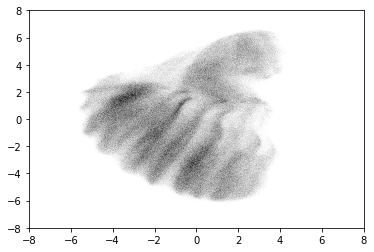

In [71]:
fig, ax = plt.subplots()
ax.scatter(embedding[:,0], embedding[:,1], s=1, color='k', alpha = 0.005)
ax.set_xlim([-8,8])
ax.set_ylim([-8,8])

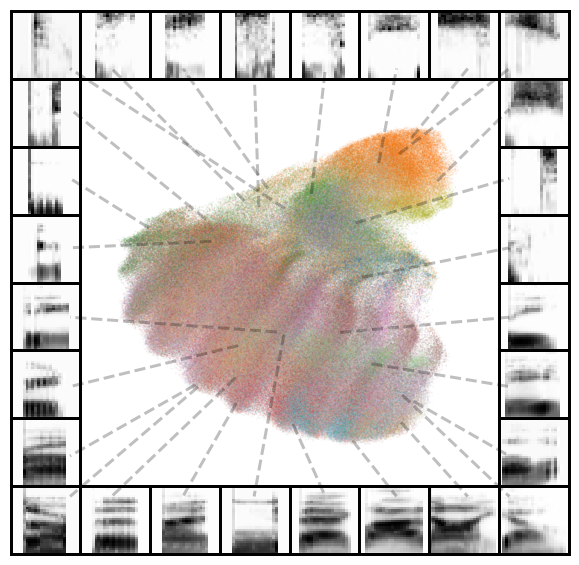

In [78]:
nex = -1
scatter_spec(
    embedding[:nex],
    specs[:nex],
    column_size=8,
    #x_range = [-4.5,4],
    #y_range = [-4.5,5.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.2,
    scatter_kwargs = {
        'labels': syllable_df.labels.values[:nex],
        'alpha':0.15,
        's': 0.1,
        'show_legend': False
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':3,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,

);
save_fig(FIGURE_DIR / 'discrete_umap' / 'phonemes', dpi=300, save_jpg=True, save_png=True)